In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='../../data/')

# randomly pick 1000 points
N = 200
X = mnist.data[np.random.choice(mnist.data.shape[0], N)]/255.

28


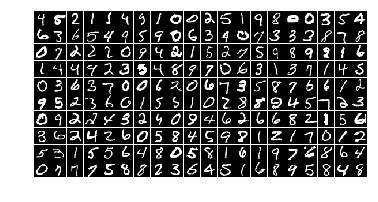

In [3]:
from display_network import * 
from matplotlib.backends.backend_pdf import PdfPages


plt.axis('off')
A = display_network(X.T, 10, N/10)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('mnist_ex.png', bbox_inches='tight', dpi = 600)
plt.show()


In [7]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

K = 10
N = 1000
X = mnist.data[np.random.choice(mnist.data.shape[0], N)]/255.
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

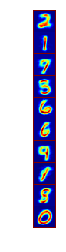

In [23]:
plt.axis('off')
A = display_network(kmeans.cluster_centers_.T, 10, 1)
f2 = plt.imshow(A, interpolation='nearest',cmap = plt.cm.jet )

plt.savefig('mnist_centroids.png', bbox_inches='tight', dpi = 600)
plt.show()


In [31]:
N0 = 10;
K = 10
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X[pred_label == k, :]
    
    # random points in each cluster 
    X1[N0*k: N0*k + N0,:] = Xk[:N0, :]
    
    # N0 nearest points 
    centroid_k = kmeans.cluster_centers_[k]
    neigh = NearestNeighbors(N0) # get 5 nearest neighbors 
    neigh.fit(Xk)
    
    X2[N0*k: N0*k + N0,:] = Xk[neigh.kneighbors(centroid_k, N0)[1][0], :]

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1

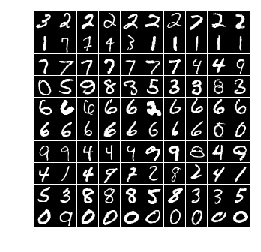

In [40]:
# random points in cluster 
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('mnist_cluster_random.png', bbox_inches='tight', dpi = 600)
plt.show()

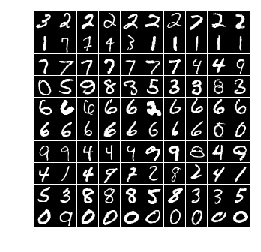

In [41]:
# nearest points 
plt.axis('off')
A = display_network(X1.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.savefig('mnist_cluster_nn.png', bbox_inches='tight', dpi = 600)
plt.show()

In [42]:
# merge two image 

import sys
from PIL import Image

def merge_imgs(inputs, output):
    images = map(Image.open, inputs)

    widths, heights = zip(*(i.size for i in images))


    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
      new_im.paste(im, (x_offset,100))
      x_offset += im.size[0]

    new_im.save(output)
    
    
inputs = ['mnist_centroids.png', 'mnist_cluster_random.png']
output = 'mnist_random.png'
merge_imgs(inputs, output)

inputs = ['mnist_centroids.png', 'mnist_cluster_nn.png']
output = 'mnist_nn.png'
merge_imgs(inputs, output)